In [8]:
from __future__ import division
import random

import pandas as pd
import numpy as np

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, make_scorer
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
%matplotlib inline

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from collections import Counter
import os

home_dir = os.getcwd()


# Data preparation

In [13]:
initial_data = pd.read_csv(home_dir + '/initial_dataset', index_col=0)

init_target_y = initial_data.iloc[:, 0]  # First column in labels
init_data_x = initial_data.drop(initial_data.columns[0], axis=1)  # First column in labels
    
init_data_x.head(5)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,3.615349e-03,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.030805,1.739484e-02,4.795147e-02,5.279281e-02,1.331823e-02,0.004917,2.386889e-03,0.0,0.0,0.0
1,1.614488e-07,0.0,1.000000,2.065042e-08,0.0,0.0,0.0,0.0,0.0,0.000004,...,0.000002,2.647009e-07,4.909169e-07,4.421068e-07,8.185077e-07,0.000003,1.595715e-08,0.0,0.0,0.0
2,4.955494e-06,0.0,0.000002,1.651831e-06,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000035,1.817014e-05,8.424340e-05,3.303663e-06,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0
3,3.129575e-05,0.0,0.000056,5.435577e-05,0.0,0.0,0.0,0.0,0.0,0.000262,...,0.000392,5.929720e-05,9.059295e-05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0
4,5.442549e-04,0.0,0.000011,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000826,...,0.001846,1.107719e-03,1.911295e-03,1.173350e-03,1.956116e-03,0.014855,3.201500e-06,0.0,0.0,0.0


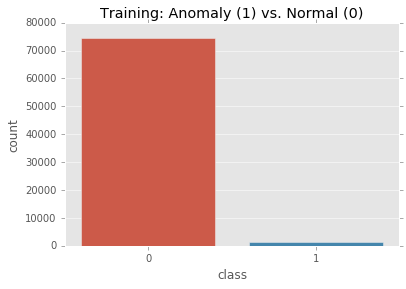

In [14]:
sns.countplot('class', data = initial_data)
plt.title('Training: Anomaly (1) vs. Normal (0)')
plt.show()

In [15]:
initial_data.head(5)

,class,0,1,2,3,4,5,6,7,8,...,160,161,162,163,164,165,166,167,168,169
0,0,3.615349e-03,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.030805,1.739484e-02,4.795147e-02,5.279281e-02,1.331823e-02,0.004917,2.386889e-03,0.0,0.0,0.0
1,0,1.614488e-07,0.0,1.000000,2.065042e-08,0.0,0.0,0.0,0.0,0.0,...,0.000002,2.647009e-07,4.909169e-07,4.421068e-07,8.185077e-07,0.000003,1.595715e-08,0.0,0.0,0.0
2,0,4.955494e-06,0.0,0.000002,1.651831e-06,0.0,0.0,0.0,0.0,0.0,...,0.000035,1.817014e-05,8.424340e-05,3.303663e-06,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0
3,0,3.129575e-05,0.0,0.000056,5.435577e-05,0.0,0.0,0.0,0.0,0.0,...,0.000392,5.929720e-05,9.059295e-05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0
4,0,5.442549e-04,0.0,0.000011,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.001846,1.107719e-03,1.911295e-03,1.173350e-03,1.956116e-03,0.014855,3.201500e-06,0.0,0.0,0.0


In [16]:
# X_train, X_test, y_train, y_test, whole_dataset_x, whole_dataset_y 

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

# Grid Search

In [18]:
n_neighbors = [3, 5, 11, 19, 22, 25, 33]
weights = ["uniform", "distance"]
metric = ["euclidean", "manhattan"]
kf = KFold(n_splits=10)

In [19]:
param_grid = dict(n_neighbors = n_neighbors, weights = weights,metric = metric)

gscv = GridSearchCV(knn, param_grid, scoring="f1", cv=kf, verbose = 1, 
                      n_jobs = -1)
grid_result = gscv.fit(init_data_x, init_target_y)

grid.best_params_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 109.4min finished


NameError: name 'grid' is not defined

In [20]:
grid_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [21]:
grid_result.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [23]:
best_knn = grid_result.best_estimator_

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.271663 using {'n_neighbors': 3, 'metric': 'manhattan', 'weights': 'distance'}


In [ ]:
prediction_prob = best_grid.predict_proba(x_test_less_feat)
       
predictions = []
true_labels = []
for pr in prediction_prob:
    if pr[0] > 0.95:
        predictions.append(0)  # Neg
    else:
        predictions.append(1)  # Pos

accuracy = 0
for i in range(0, len(predictions)):
    if predictions[i] == y_test[i]:
        accuracy +=1


average_precision = average_precision_score(y_test, predictions)


total_cost = find_cost(y_test, predictions)

####  Evaluation metrics after Grid Search

In [ ]:
print("Accuracy Score : ",accuracy_score(prediction,y_test))
print("Total Cost is : ", total_cost)
print("F1 Score : ",f1_score(y_test, prediction, average=None))
print("Presicion Score :",precision_score(y_test, prediction, average=None))
print("ROC AUC Score :",roc_auc_score(y_test, prediction))
print("confusion matrix:", confusion_matrix(y_test, predictions))
print("Cross Validation Score :",cross_val_score(model, whole_dataset_x, whole_dataset_Y, cv=10, n_jobs=-1))  



# Cost Function

In [ ]:
def find_cost(y_test,predictions):
    normal_false = 0
    anomaly_false = 0
    normal_correct = 0
    anomaly_correct = 0
    for i in range(0, len(predictions)):
        if predictions[i] == 0 and y_test[i] == 1:  # He predicted normal but it was anomaly
            normal_false += 1
        elif predictions[i] == 1 and y_test[i] == 0:  # He predicted anomaly but it was normal
            anomaly_false += 1
        elif predictions[i] == 0 and y_test[i] == 0: # He predicted normal and it was normal
            normal_correct += 1
        elif predictions[i] == 1 and y_test[i] == 1: # He predicted anomaly and it was anomaly
            anomaly_correct += 1
            
    total_cost = 10*anomaly_false + 500*normal_false
    
    # print (("False anomaly predictions are {}".format(anomaly_false)))
    # print (("False normal predictions are {}".format(normal_false)))
    # print (("Correct normal predictions are {}".format(normal_correct)))
    # print (("Correct anomaly predictions are {}".format(anomaly_correct)))
    # print (("Total Cost is {}".format(total_cost)))
    
    return total_cost

    

# Feature Selection

In [ ]:
def feature_selection(X_train,y_train, num_of_features, X_test, y_test):
# Build RF classifier to use in feature selection
    knn = KNeighborsClassifier(n_neighbors=3)
    #create new scoring parameter based on cost function
    #cost_scorer = make_scorer(find_cost, greater_is_better= False)
    # Build step forward feature selection
    sfs1 = sfs(knn,
               k_features= num_of_features,
               forward=True,
               floating=False,
               verbose=2,
               scoring="f1",
               cv=5,
               n_jobs=-1)

    # Perform SFFS
    sfs1 = sfs1.fit(X_train, y_train)

    feat_cols = list(sfs1.k_feature_idx_)
    print(feat_cols)
    
    return feat_cols

## Execute model

In [ ]:
def execute_classifier(use_training, clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # predictions = np.round(predictions)

    if  use_training:
        prediction_prob = clf.predict_proba(X_test)
       
        predictions = []
        true_labels = []
        for pr in prediction_prob:
            if pr[0] > 0.95:
                predictions.append(0)  # Neg
            else:
                predictions.append(1)  # Pos

    accuracy = 0
    for i in range(0, len(predictions)):
        if predictions[i] == y_test[i]:
            accuracy +=1


    conf_mat = confusion_matrix(y_test, predictions)        
    average_precision = average_precision_score(y_test, predictions)

    #find average precision recall
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    precision, recall, _ = precision_recall_curve(y_test, predictions)

    #plot precision recall


    find_cost( y_test, predictions)
    print (("Total Cost is {}".format(total_cost)))

    return predictions, accuracy/len(predictions)

# KNN with all features

In [ ]:
knn = KNeighborsClassifier(3)

predictions, accuracy = execute_classifier(True, knn, X_train, X_test, y_train, y_test)
print("Accuracy of KNN with 170 features, is {} %".format(round((accuracy)*100, 5)))
print_metrics()

In [ ]:
# feat_cols = [9, 14, 21, 33, 37, 57, 94, 161, 162, 165] with imbalanced data
feat_cols = [0, 20, 71, 78, 89, 90, 100, 106, 142, 147]

#for i in feat_cols :
#feat_cols = feature_selection(X_train,y_train, 10, X_test, y_test)

x_train_less_feat = X_train[:, feat_cols]
x_test_less_feat = X_test.iloc[:,feat_cols]

x_train_less_feat.shape

In [ ]:
x_test_less_feat.shape


In [ ]:
print("Accuracy Score : ",accuracy_score(predictions,y_test))
print("F1 Score : ",f1_score(y_test, prediction, average=None))
print("Presicion Score :",precision_score(y_test, prediction, average=None))
print("ROC AUC Score :",roc_auc_score(y_test, prediction))
print("confusion matrix:", confusion_matrix(y_test, predictions))
print("Cross Validation Score :",cross_val_score(model, whole_dataset_x, whole_dataset_Y, cv=10, n_jobs=-1))  



## After the feature selection

In [ ]:
# predictions after feature selection
predictions_tocompare, accuracy_tocompare = execute_classifier(True, knn, x_train_less_feat, x_test_less_feat, y_train, y_test)
print("Accuracy of KNN with {} features, is {} %".format(len(feat_cols), round((accuracy_tocompare)*100, 5)))

In [ ]:
print("Accuracy Score : ",accuracy_score(predictions_tocompare,y_test))
print("F1 Score : ",f1_score(y_test, predictions_tocompare, average=None))
print("Presicion Score :",precision_score(y_test, predictions_tocompare, average=None))
print("ROC AUC Score :",roc_auc_score(y_test, predictions_tocompare))
print("confusion matrix:", confusion_matrix(y_test, predictions_tocompare))
print("Cross Validation Score :",cross_val_score(knn, whole_dataset_x, whole_dataset_Y, cv=10, n_jobs=-1))  

